# PRIMEPHONIC

#### "Music is a language that doesn’t speak in particular words. It speaks in emotions, and if it’s in the bones, it’s in the bones.”


## Knowledge and Introduction

Labels and metadata is the information that coexists with every digital music file: each and every piece of information about a selection of music that a listener might find useful to know, and what makes the information in one file discernible from the next. In the case of classical music, relevant and important metadata includes the name of the piece of music, the composer, the album it's from, the performers, the label that released the recording and the year it was recorded.

Here the dataset contain various labels relating to the tracks and their respective contributers i.e name of artist, their role and if they belong to qualified artist profile. 

### Dataset Information:

The dataset having 83307 tracks having features i.e name, role & the status of their respective contributors.
We will now prioritize the list of artists by analysing the given information.

#### Loading of dataset (track_contributors.ndjson) and conervting the same into pandas dataframe for more simplified analysis. 

In [226]:
import numpy as np
import pandas as pd
import ujson as json
import string


with open('C:/track_contributors.ndjson') as f:
    json_block=[]
    block2=[]
    for line in f:
      json_block.append(json.loads(line))

for t in json_block:
      for i,v in t.items():
            for k in v:
                  block2.append(k)

# Normalization of json file and converting it into pandas dataframe.            

jn=pd.io.json.json_normalize(block2)
jn1 = pd.DataFrame.from_dict(jn, orient='columns')
print(jn1.head())

   has_artist_profile                         name        roles
0                True              Dora Bratchkova           []
1                True                   Mikel Toms  [Conductor]
2                True              Douglas Knehans   [Composer]
3                True  Brno Philharmonic Orchestra  [Orchestra]
4                True                   Mikel Toms  [Conductor]


## Analysis-1

Calculations of artists and number of times they appears into the dataset. 

Total number of artists who contributed in tracks are 61391.

Note: These following artists belong to both qualified artist profile and non qualified artist profile. In further analysis we only mine for the artists which belong to true artist profile (i.e qualified artists).

In [232]:
unique_name_counts = jn1['name'].value_counts()

sorted_name = []

for entity in unique_name_counts.iteritems():
    check = entity[0]
    sorted_name.append(check)
print(check, unique_name_counts)



Melanie Scafide Russell Johann Sebastian Bach               4194
Traditional                         2811
Wolfgang Amadeus Mozart             2713
Anonymous                           2345
Ludwig van Beethoven                1969
George Frideric Handel              1309
Franz Schubert                      1065
Robert Schumann                     1056
Giuseppe Verdi                      1029
Antonio Vivaldi                      956
Johannes Brahms                      919
Richard Wagner                       907
Frédéric Chopin                      868
Franz Joseph Haydn                   758
Berliner Philharmoniker              616
Pyotr Ilyich Tchaikovsky             600
Wiener Philharmoniker                580
London Symphony Orchestra            579
Claude Debussy                       561
Felix Mendelssohn                    534
Herbert von Karajan                  510
Giacomo Puccini                      508
Richard Strauss                      503
Georg Philipp Telemann           

## Calculating prioritized list of Artists;

Now, we will prioritize the artists according to the information given.

Rules :
1. Mine the artists who contributed to the maximum number of tracks, experienced artist will tops the table.
2. We only mine the artists who qualified for the artist i.e they must be having artist_profile= True.
3. To ease the caculations, we now limiting our algorithm to prioritize top 5 artits, we can run the iterations for all the descending artists also.



Johann Sebastian Bach
Counter({'Composer': 4193, 'Writer': 1})
4194


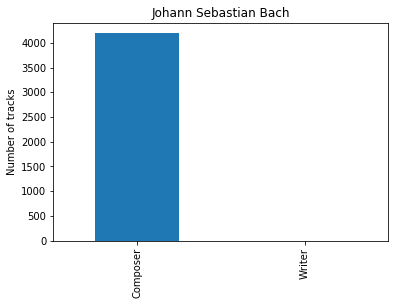

-------------------------------------------------------------------
Wolfgang Amadeus Mozart
Counter({'Composer': 2713, 'Piano': 1, 'Writer': 1})
2715


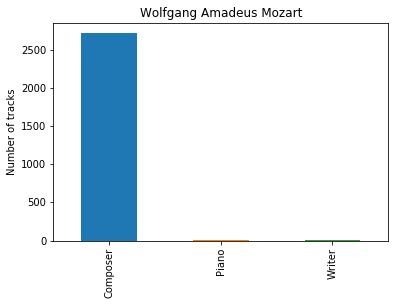

-------------------------------------------------------------------
Ludwig van Beethoven
Counter({'Composer': 1969, 'Writer': 3})
1972


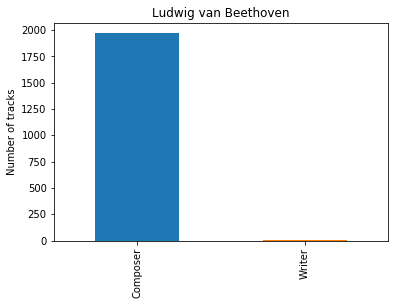

-------------------------------------------------------------------
George Frideric Handel
Counter({'Composer': 1308})
1308


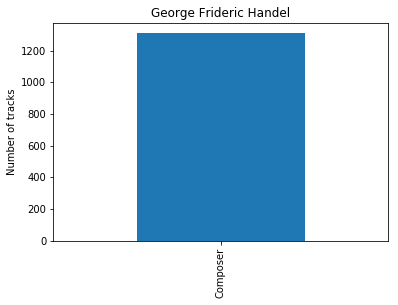

-------------------------------------------------------------------
Franz Schubert
Counter({'Composer': 1063, 'Writer': 3})
1066


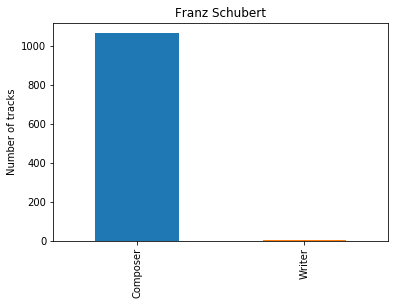

-------------------------------------------------------------------


In [237]:
from collections import Counter
import matplotlib.pylab as plt


X=[]
Y=[]

for i, item in enumerate (sorted_name):
    # Limiting the algorithm to calculate top 5 artists
    limit=5
    count = 0
    check = []

    
    for index, row in jn1.iterrows():
        #the artist must be having artist_profile =True
        if (row['has_artist_profile'] == True) & (item == row['name']):
            for j, attribute in enumerate (row['roles']):
                check.append(attribute)
                count = count+1

    if (len(check) > 0):
        print(item)
        p = Counter(check)
        print(p)
        print(count)
        
        X.append(item)
        Y.append(count)
        
        key = p.keys()
        df = pd.DataFrame(p,index=key)
        df.drop(df.columns[1:], inplace=True)
        df=df.iloc[0]
                   
        df.plot(kind='bar')
        plt.title(item)
        plt.ylabel('Number of tracks')
        plt.show()
    
        print("-------------------------------------------------------------------")
    
    if i == limit+1:
            break     


## We have prioritized with top 5 contributors. Similarly, we can do for others as well.

#### The resulted prioritized list of artists :
1. Johann Sebastian Bach
2. Wolfgang Amadeus Mozart
3. Ludwig Van Beethoven
4. George Frideric Handel
5. Franz Schubert

In the above prioritized list we see that Johann Sebastian Bach tops the list by composing 4193 tracks and writing 1 track. Following the given dataset Johann Sebastian Bach is the best composer.

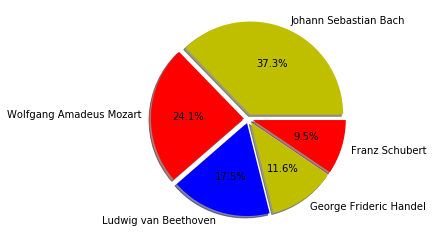

In [239]:
colors = ['y','r','b']
i=0
explode_value =[]

while i<len(Y):
    explode_value.append(0.05)
    i=i+1

plt.pie(Y, labels = X, colors=colors ,shadow = True, explode = explode_value, autopct = '%1.1f%%')
plt.axis('equal')

plt.show()

# Scope:

In the respected dataset, we have deal with 3 features i.e has_artist_profile, name, role. If we were having more features like rating of tracks, detailed artist profile it will results for more better and true results. We also follow this to build a recommender system for the users by having their followed artist list.